# Ensemble Techniques

* Ensemble means combining multiple models or utilize multiple models and train our dataset .

* Two Techniques :
> 1. Bagging (Bootstrap Aggragation)
>> * Random Forest
> 2. Bootsing
>> * Adaboost
>> * Gradient Boosting
>> * XgBoost

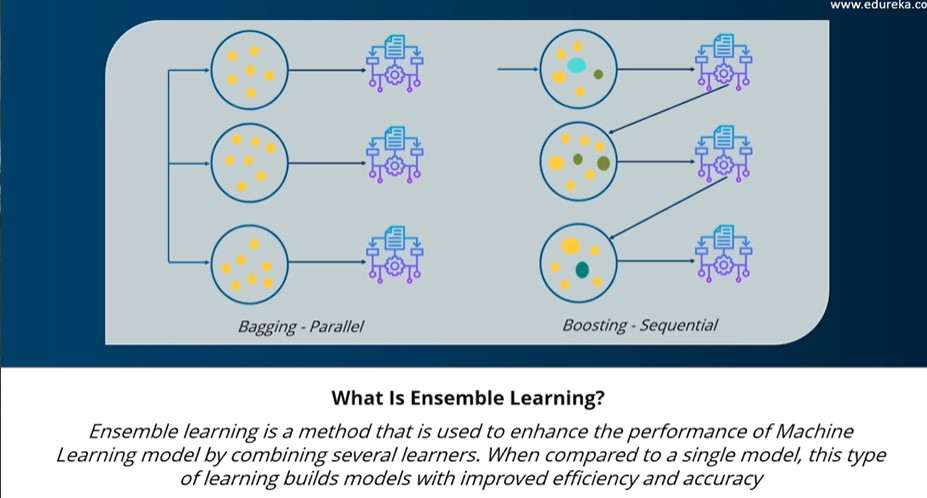

## 1. Bagging :

* Bootstrap aggregating, also called bagging (from bootstrap aggregating), is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting.

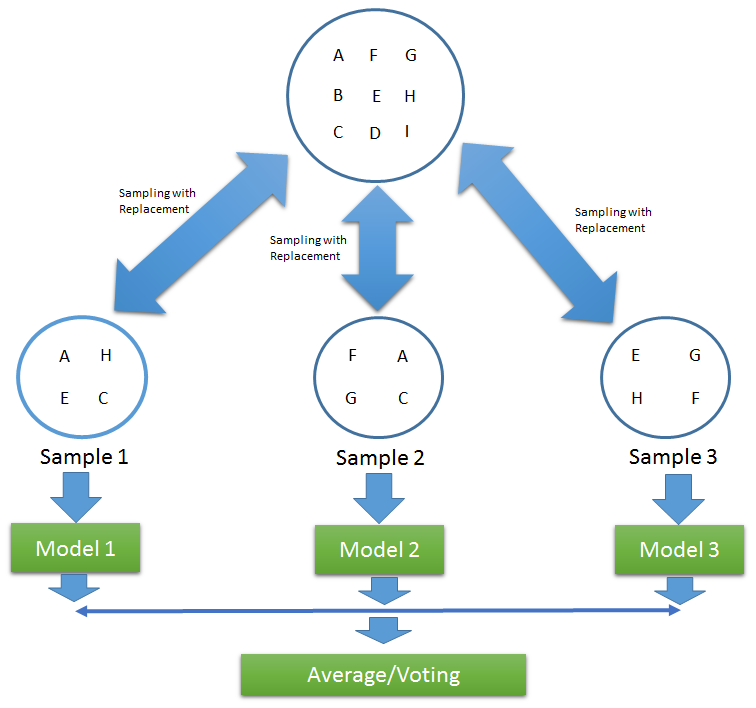

## Random Forest 

* Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

* Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

* Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

* The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.


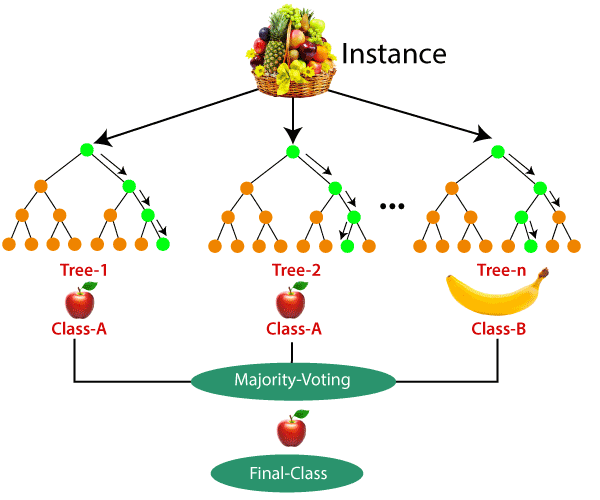


### Why use Random Forest :

* It takes less training time as compared to other algorithms.
* It predicts output with high accuracy, even for the large dataset it runs efficiently.
* It can also maintain accuracy when a large proportion of data is missing.

### Applications of Random Forest :

* There are mainly four sectors where Random forest mostly used:


1. __Banking:__ Banking sector mostly uses this algorithm for the identification of loan risk.
2. __Medicine:__ With the help of this algorithm, disease trends and risks of the disease can be identified.
3. __Land Use:__ We can identify the areas of similar land use by this algorithm.
4. __Marketing:__ Marketing trends can be identified using this algorithm.

## 2 . Boosting :

* The basic principle behind the working of the boosting algorithm is to generate multiple weak learners and combine their predictions to form one strong rule .

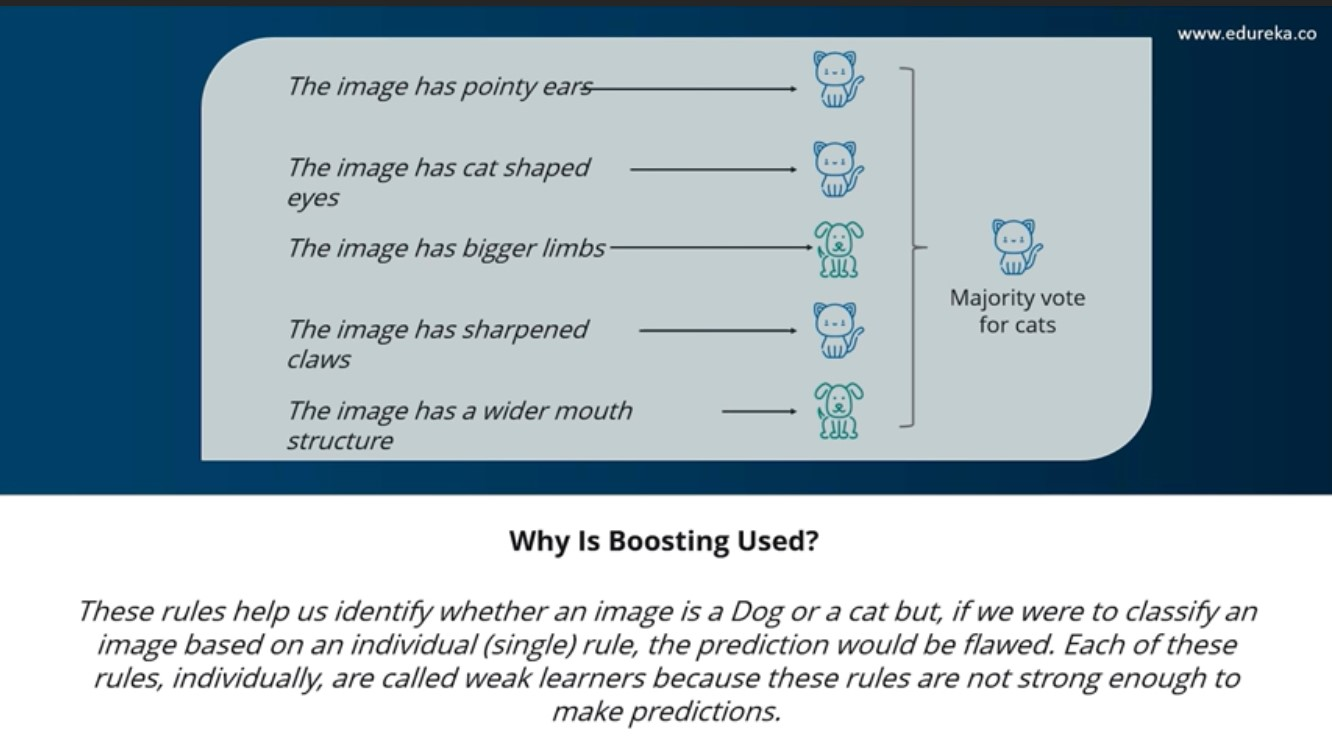

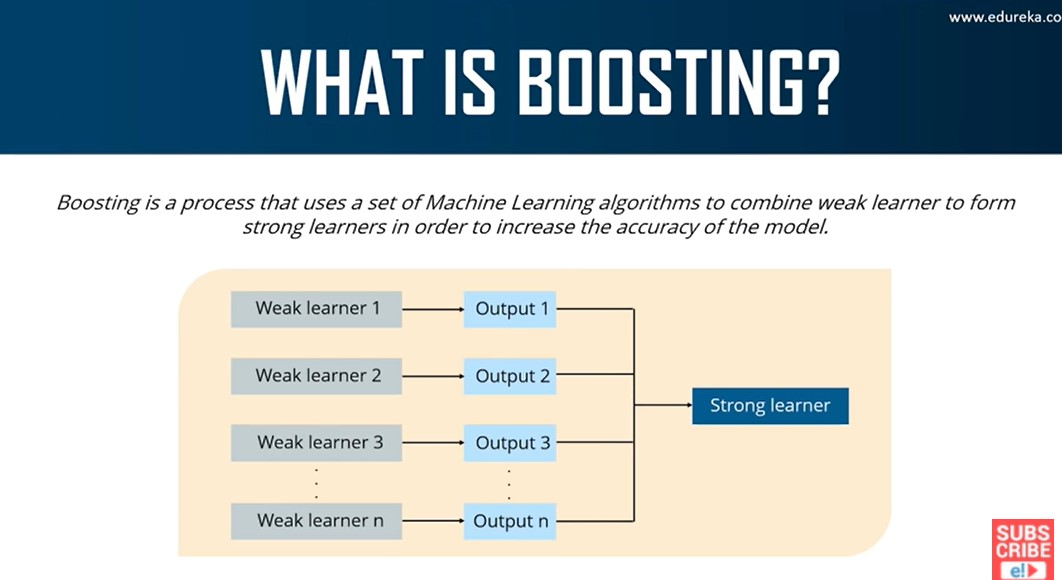

__Steps involves in Boosting Algo :__
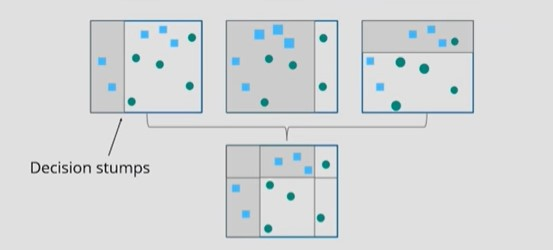

* Decision Stump is a single level decision tree .
* Stumps are weak learners 
* Adaboost uses forest of stumps .

> Step 1: The base algorithm reads the data and assigns equal weight to each sample observation .

> Step 2: False predictions are assigned to the next base learner with a higher weightage on their incorrect predictions .

> Step 3: Repeat step 2 until the algorithm can correctly classify the output .

## AdaBoost (Adaptive Boosting) 

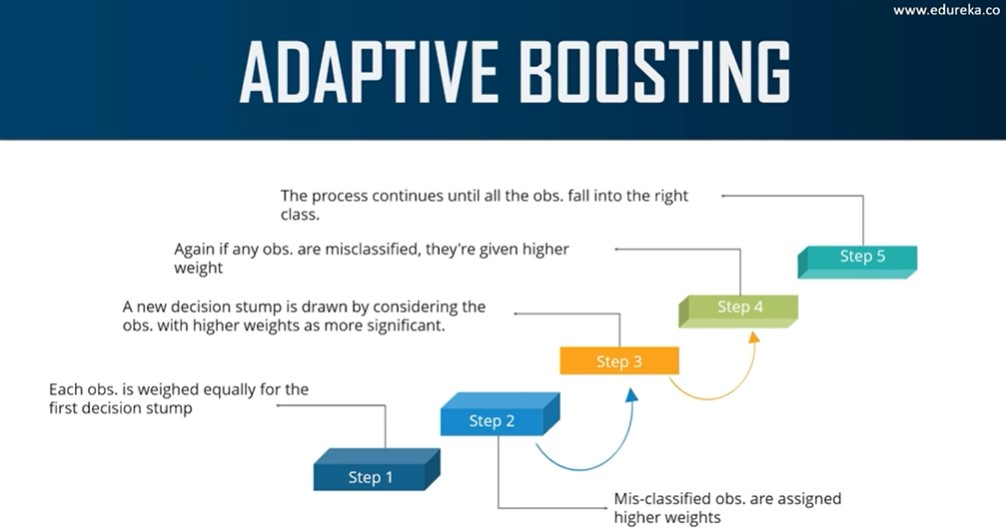

__Steps involved in AdaBoosting :__

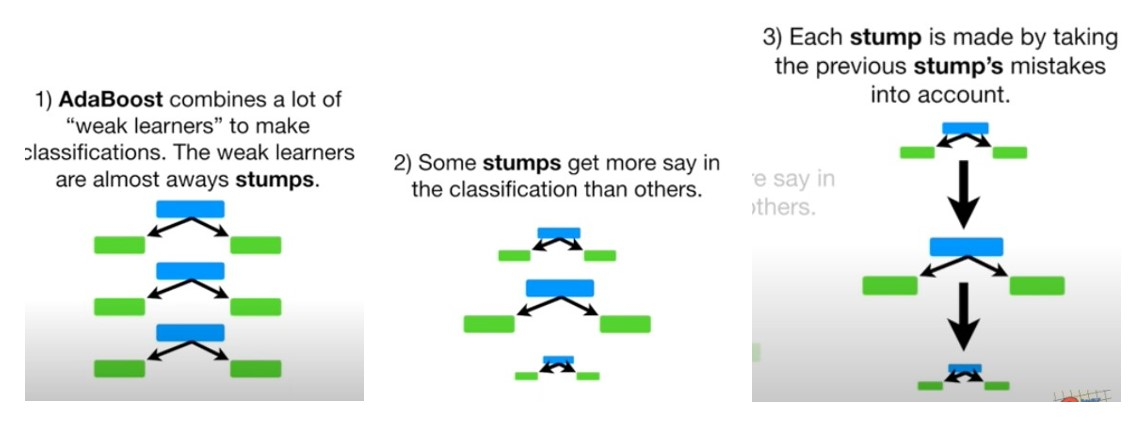

* AdaBoost can also be used in regression problems but it is most commonly used in classification problems .

* Eg. : https://www.youtube.com/watch?v=LsK-xG1cLYA

## Gradient Boosting 

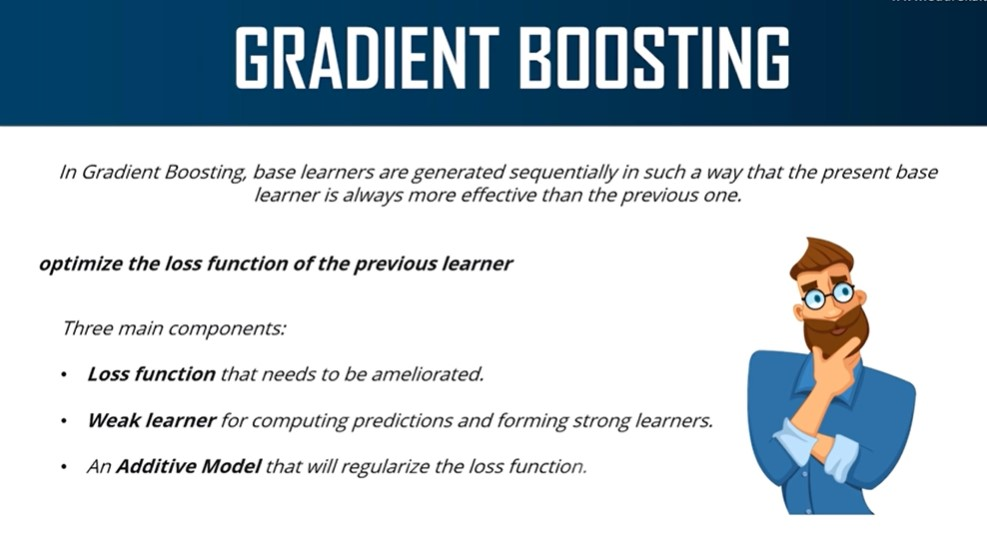

## XgBoost  (Extreme Gradient Boosting)

* As Gradient Boosting takes a lot of time to compute so XgBoost was introduced . It extremely boost the performance of our model .

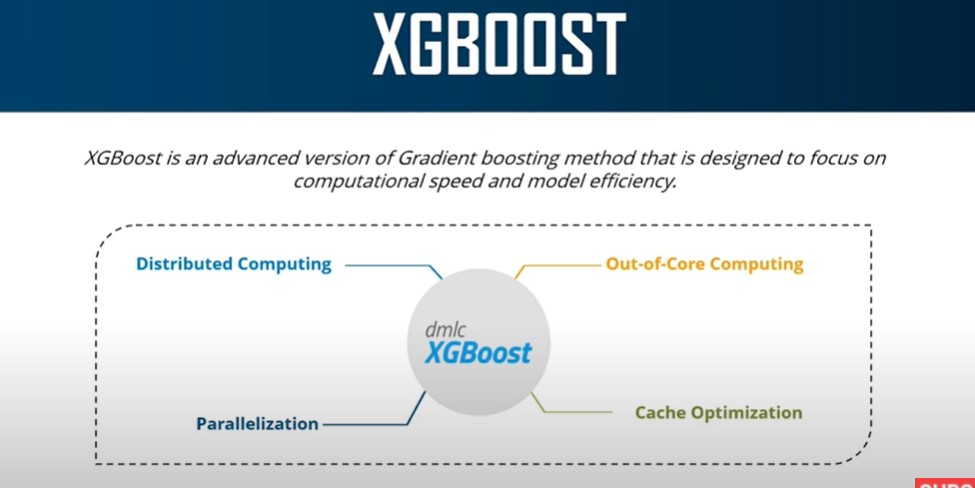

__Parallelization :__ Creating decision trees paralley .

__Distributed Computing :__ To evaluate any large and complex models .

__Out of Core Computing :__ To analyse huge and varied dataset .

__Cache Optimization :__ Inorder to make the best use of our hardware and resources .

__Hyperparameter Optimization for XgBoost :__

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

data = 'https://raw.githubusercontent.com/krishnaik06/Hyperparameter-Optimization/master/Churn_Modelling.csv'
df = pd.read_csv(data)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


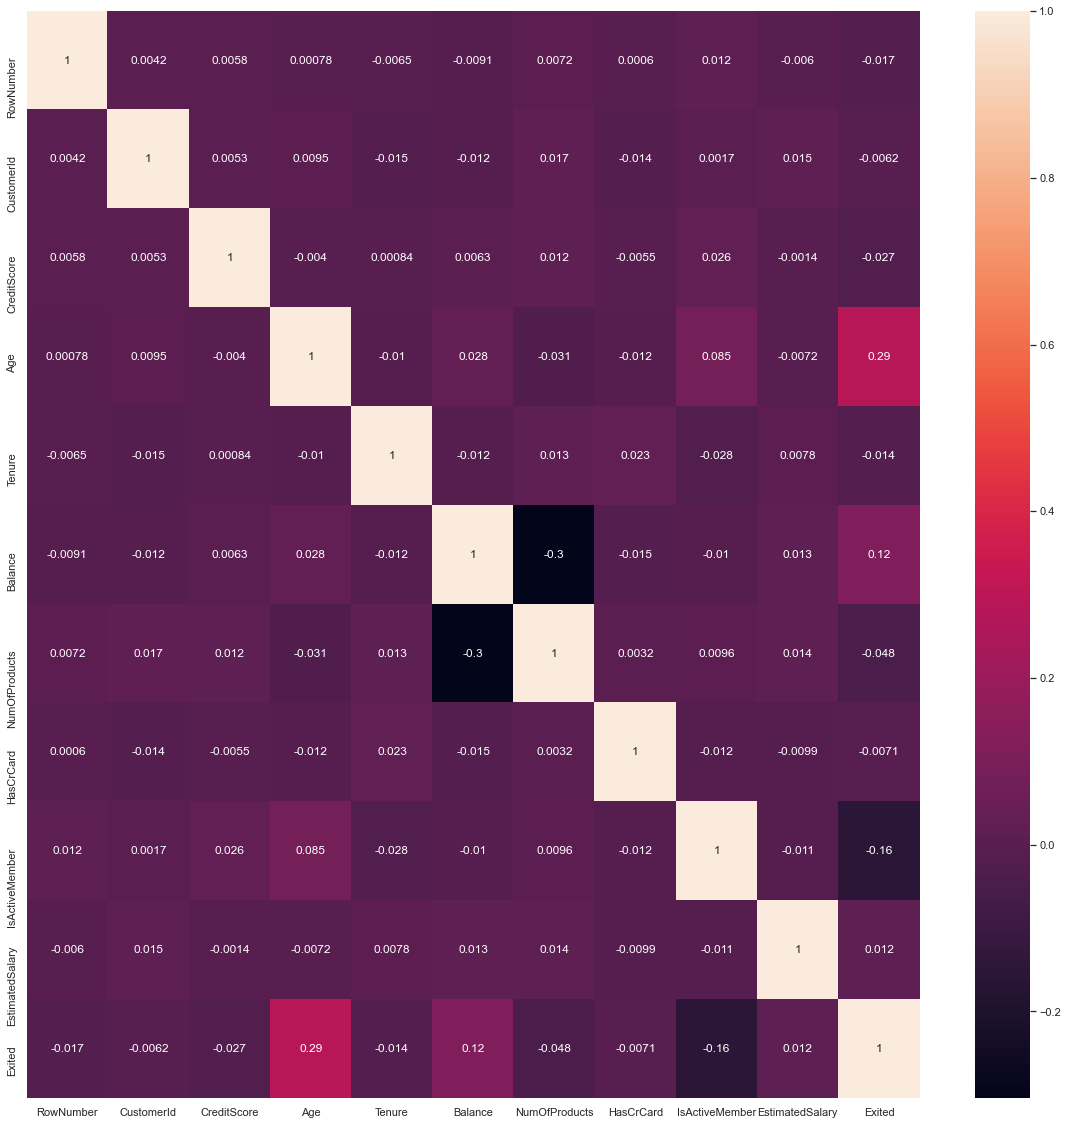

In [6]:
# Check the correlation

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True);

In [7]:
# Dependent and independent features

X = df.drop('Exited',axis=1)
y = df['Exited']

print('X shape',X.shape)
print('y shape',y.shape)

X shape (10000, 13)
y shape (10000,)


In [8]:
# Create Dummy variables
 
GG =  pd.get_dummies(X[['Geography','Gender']],drop_first=True)

# Drop Duplicate and unnecessary columns
 
X = X.drop(['Geography','Gender','CustomerId','Surname'],axis=1)

# Concat the dummy var

X = pd.concat([GG,X],axis=1)

X.head()

,Geography_Germany,Geography_Spain,Gender_Male,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,0,0,1,619,42,2,0.00,1,1,1,101348.88
1,0,1,0,2,608,41,1,83807.86,1,0,1,112542.58
2,0,0,0,3,502,42,8,159660.80,3,1,0,113931.57
3,0,0,0,4,699,39,1,0.00,2,0,0,93826.63
4,0,1,0,5,850,43,2,125510.82,1,1,1,79084.10


In [17]:
# Import Xgboost 
# Hyperparameter optimization using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
# !pip install xgboost
from xgboost import XGBClassifier
classifier = XGBClassifier()

# Selecting hyperparametres 

params = {
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,8,10,12,15],
    "min_child_weight" : [1,3,5,7],
    "gamma" : [0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree" : [0.3,0.4,0.5,0.7]
}

# Randomized Search
random_search = RandomizedSearchCV(classifier,
                                   param_distributions=params,
                                   n_iter=5,
                                   scoring='roc_auc',
                                  n_jobs=-1,
                                  cv=5,
                                  verbose=3)

# Train the model

random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   26.7s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   28.7s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [24]:
# Best parameters 

print('BEST ESTIMATORS :')
print(random_search.best_estimator_)
print('\n\nBEST PARAMETERS :')
print(random_search.best_params_)

BEST ESTIMATORS :
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


BEST PARAMETERS :
{'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7}


In [31]:
# Use the best parameters to train the model

classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3,  monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


from sklearn.model_selection import cross_val_score

score = cross_val_score(classifier,X,y,cv=10)
score

array([0.863, 0.86 , 0.863, 0.857, 0.862, 0.852, 0.867, 0.873, 0.855,
       0.813])

In [32]:
score.mean()

0.8564999999999999